# Задача 1

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

### Генератор случайной матрицы $n \times m$

In [2]:
def random_matrix(n, m, lower=0, upper=1):
    return sps.uniform.rvs(size=(n, m), loc=lower, scale=(upper - lower))

random_matrix(2, 3, -5, 5)

array([[ 3.62998994, -0.55055174, -2.3538234 ],
       [-4.71285689, -1.22500572,  2.00966277]])

### Генератор случайной диагональной матрицы 

In [3]:
def random_diagonal(n, lower=0, upper=1):
    return np.diag(sps.uniform.rvs(size=n, loc=lower, scale=(upper - lower)))

random_diagonal(5)

array([[0.15592288, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.24249926, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68103209, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.21794448, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.63795183]])

### Генератор случайной верхней треугольной матрицы

In [4]:
def random_upper_triangle(n, lower=0, upper=1):
    return np.triu(random_matrix(n, n, lower=lower, upper=upper))
                   
random_upper_triangle(5, -3, 3)

array([[ 2.43483689, -1.53529711, -2.15822797, -0.47457331, -1.10135986],
       [ 0.        , -2.78190834, -1.4802548 ,  1.9490083 ,  2.59174548],
       [ 0.        ,  0.        ,  1.28402296, -0.88039451, -1.21955723],
       [ 0.        ,  0.        ,  0.        , -0.84386643,  0.07852274],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  2.0074523 ]])

### Генератор случайной нижней треугольной матрицы

In [5]:
def random_lower_triangle(n, lower=0, upper=1):
    return random_upper_triangle(n, lower=lower, upper=upper).T

random_lower_triangle(5, -2, 2)

array([[-1.25217577,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.86853437, -1.22058456,  0.        ,  0.        ,  0.        ],
       [-1.12238136, -0.87457203, -1.61352361,  0.        ,  0.        ],
       [-1.11020881, -1.71775351, -1.53540888, -1.92668101,  0.        ],
       [-0.62325662, -0.25501159,  0.53940506,  0.8097094 ,  1.97183095]])

### Генератор случайной симметричной матрицы

In [6]:
def random_symmetrical(n, lower=0, upper=1):
    x = random_matrix(n, n, lower=lower, upper=upper)
    return((x + x.T) / 2)

random_symmetrical(5)

array([[0.99680443, 0.68529366, 0.2799695 , 0.52788296, 0.23445703],
       [0.68529366, 0.77785868, 0.57939465, 0.30179846, 0.31774323],
       [0.2799695 , 0.57939465, 0.90148605, 0.54742063, 0.87348854],
       [0.52788296, 0.30179846, 0.54742063, 0.68085372, 0.33699129],
       [0.23445703, 0.31774323, 0.87348854, 0.33699129, 0.26160464]])

### Генератор случайной вырожденной матрицы

In [7]:
def random_degenerate(n, lower=0, upper=1):
    x = random_matrix(n, n, lower=lower, upper=upper)
    # заменым k-ый столбец линейной комбинацией других столбцов
    k = sps.randint(0, n).rvs()
    x[:, k] *= 0
    distr = sps.uniform().rvs(n - 1)
    weights = distr / sum(distr)
    x[:, k] = np.delete(x, (k), axis=1) @ weights.T
    return x
    

r = random_degenerate(6)
print(r)
print("det == 0:", np.allclose(np.linalg.det(r), 0))

[[0.46812909 0.72803042 0.32868707 0.26381994 0.50391511 0.61589466]
 [0.61929353 0.3267099  0.36397952 0.82822693 0.78933572 0.44879761]
 [0.57717138 0.48117955 0.66987328 0.29464631 0.33598539 0.87468016]
 [0.80629581 0.22726387 0.93047264 0.60485346 0.89036047 0.93130764]
 [0.72758705 0.75101124 0.25332274 0.48537186 0.89944894 0.91255796]
 [0.51785786 0.25225399 0.67312002 0.10685976 0.54653885 0.80192091]]
det == 0: True


### Генератор матрицы $n \times m$ ступенчатого вида ранга $m$

In [8]:
def random_row_echelon(n, m, lower=0, upper=1):
    x = random_upper_triangle(n, lower=lower, upper=upper)
    # удалим n-m строк
    k = np.random.choice(np.arange(1, n), size=(n - m), replace=False)
    x = np.delete(x, k, axis=0)
    x = np.vstack((x, np.zeros((n - m, n))))
    # ленивая проверка ранга
    if np.linalg.matrix_rank(x) != m:
        return random_row_echelon(n, m, lower=lower, upper=upper)
    return x

r = random_row_echelon(100, 87)
print(r)
print(np.linalg.matrix_rank(r))

[[0.1864709  0.99990646 0.19470851 ... 0.3840525  0.57477903 0.9447806 ]
 [0.         0.92826529 0.48011695 ... 0.6878812  0.17134241 0.23246268]
 [0.         0.         0.         ... 0.2043993  0.02117943 0.13664954]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
87


### Генератор матрицы возмущений $n \times m$

In [9]:
def random_perturbation(n, m, eps):
    return random_matrix(n, m, lower=-eps, upper=eps)

print(random_perturbation(5, 6, 0.1))

[[-0.08419881 -0.00906722  0.05263531  0.03687555  0.05658753 -0.04375738]
 [-0.03424392 -0.06924386 -0.05641448  0.00922166  0.04912081 -0.09199427]
 [ 0.04570696 -0.00520225 -0.05779297  0.00520949 -0.08052711 -0.05126333]
 [-0.01116372 -0.03384878  0.08189126  0.0103879   0.07035603 -0.09525301]
 [-0.03025103  0.01706183  0.0850764  -0.02673789 -0.0944066   0.0619095 ]]


Оценим вероятность генерации вырожденной матрицы возмущений.

In [10]:
N = 10000
n = 10
eps = 0.0001
count = 0
acount = 0

for _ in range(N):
    r = np.linalg.det(random_perturbation(n, n, eps))
    if np.allclose(0, r,  atol=1e-16):
        count += 1
    if r == 0.0:
        acount += 1

        
print(f"Из {N} сгенерированных матриц вырожденными оказались {count}. Вероятность = {count / N}")
print(f"Из {N} сгенерированных матриц вырожденными оказались {acount}. Вероятность = {acount / N}")

Из 10000 сгенерированных матриц вырожденными оказались 10000. Вероятность = 1.0
Из 10000 сгенерированных матриц вырожденными оказались 0. Вероятность = 0.0


**Из-за малости чисел оценить вырожденность матриы представялется сложным.**

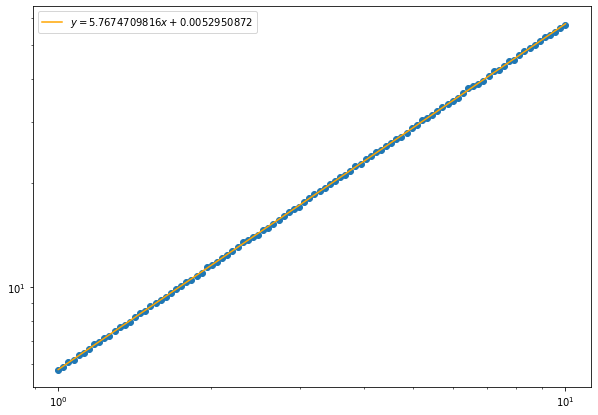

In [11]:
N = 100
M = 100
eps = np.logspace(1e-10, 1, M)
norms = np.zeros(M)
n = 10

for i in range(M):
    for _ in range(N):
        norms[i] += np.linalg.norm(random_perturbation(n, n, eps[i]))
    norms[i] /= N

plt.figure(figsize=(10, 7))
    
plt.scatter(eps, norms)
plt.xscale("log")
plt.yscale("log")

args = np.polyfit(eps, norms, 1)
plt.plot(eps, np.polyval(args, eps), color="orange", label=f"$y = {args[0]:.10f} x {args[1]:+.10f}$")
plt.legend()

Видим, что зависимость средней нормы от $\varepsilon$ прямая проходящая через ноль.  
При увеличении размера матрицы $n$ увеличиваеться наклон прямой.  
Оценим максимумы:

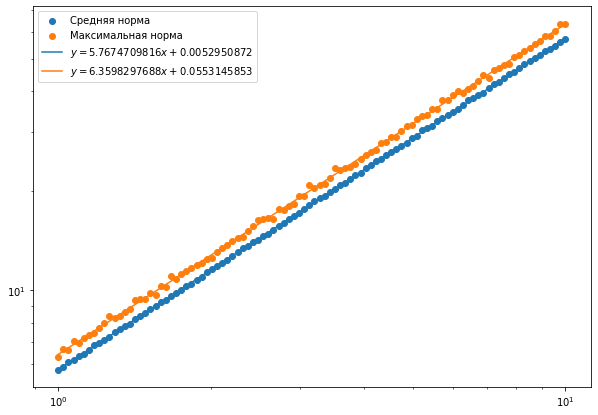

In [12]:
max_norms = np.zeros(M)

for i in range(M):
    for _ in range(N):
        max_norms[i] = max(np.linalg.norm(random_perturbation(n, n, eps[i])), max_norms[i])


plt.figure(figsize=(10, 7))
    
plt.scatter(eps, norms, label="Средняя норма")
plt.scatter(eps, max_norms, label="Максимальная норма")
plt.xscale("log")
plt.yscale("log")

args_max = np.polyfit(eps, max_norms, 1)
plt.plot(eps, np.polyval(args, eps), label=f"$y = {args[0]:.10f} x {args[1]:+.10f}$")
plt.plot(eps, np.polyval(args_max, eps), label=f"$y = {args_max[0]:.10f} x {args_max[1]:+.10f}$")
plt.legend()

Видим, что зависимость максимальной нормы от $\varepsilon$ также прямая проходящая через ноль.  
Наколн этой прямой немного больше наклона 

# Задачи 2, 3, 4

[Решение](hw_1_3_1.pdf)

# Задача 5

In [13]:
chi = 5
lambda_1 = np.arange(chi*chi).reshape((chi, chi))
lambda_2 = np.arange(chi*chi).reshape((chi, chi))
lambda_3 = np.arange(chi*chi).reshape((chi, chi))
gamma_1 = np.arange(chi ** 3).reshape((chi, chi, chi))
gamma_2 = np.arange(chi ** 3).reshape((chi, chi, chi))
U = np.arange(chi ** 4).reshape((chi, chi, chi, chi))

In [14]:
%%timeit
Z = np.einsum("ab,cbd,de,feg,gh,ijef->ahij",lambda_1, gamma_1, lambda_2, gamma_2, lambda_3, U, optimize="optimal")

3.48 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
Z = np.einsum("ab,cbd,de,feg,gh,ijef->ahij",lambda_1, gamma_1, lambda_2, gamma_2, lambda_3, U, optimize="optimal")

In [16]:
path_info = np.einsum_path("ab,cbd,de,feg,gh,ijef->ahij",lambda_1, gamma_1, lambda_2, gamma_2, lambda_3, U, optimize="optimal")
print(path_info[0])
print(path_info[1])

['einsum_path', (0, 1), (0, 4), (0, 1), (0, 2), (0, 1)]
  Complete contraction:  ab,cbd,de,feg,gh,ijef->ahij
         Naive scaling:  10
     Optimized scaling:  5
      Naive FLOP count:  5.859e+07
  Optimized FLOP count:  1.525e+04
   Theoretical speedup:  3841.961
  Largest intermediate:  6.250e+02 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   4                  cbd,ab->ad                  de,feg,gh,ijef,ad->ahij
   3                   ad,de->ae                     feg,gh,ijef,ae->ahij
   4                 gh,feg->efh                        ijef,ae,efh->ahij
   5              efh,ijef->ehij                            ae,ehij->ahij
   5               ehij,ae->ahij                               ahij->ahij


Реализуем то же при помощи простых функций

In [17]:
T_1 = np.sum(np.tensordot(gamma_1, lambda_1, axes=(1,1)), axis=0).T
print(np.array_equal(T_1, np.einsum("cbd,ab->ad", gamma_1, lambda_1)))
T_2 = np.tensordot(T_1, lambda_2, axes=(1, 0))
print(np.array_equal(T_2, np.einsum("ad,de->ae", T_1, lambda_2)))
T_3 = np.swapaxes(np.tensordot(gamma_2, lambda_3, axes=(2, 0)), 0, 1)
print(np.array_equal(T_3, np.einsum("gh,feg->efh", lambda_3, gamma_2)))
T_4 = np.moveaxis(np.diagonal(np.tensordot(T_3, U, axes=(1, 3)), axis1=0, axis2=4), -1, 0)
print(np.array_equal(T_4, np.einsum("efh,ijef->ehij", T_3, U)))
T_5 = np.tensordot(T_2, T_4, axes=(1, 0))
print(np.array_equal(T_5, Z))

True
True
True
True
True


In [18]:
%%timeit
T_1 = np.sum(np.tensordot(gamma_1, lambda_1, axes=(1,1)), axis=0).T
T_2 = np.tensordot(T_1, lambda_2, axes=(1, 0))
T_3 = np.swapaxes(np.tensordot(gamma_2, lambda_3, axes=(2, 0)), 0, 1)
T_4 = np.moveaxis(np.diagonal(np.tensordot(T_3, U, axes=(1, 3)), axis1=0, axis2=4), -1, 0)
T_5 = np.tensordot(T_2, T_4, axes=(1, 0))

118 µs ± 4.16 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [19]:
%%timeit
np.tensordot(np.tensordot(np.sum(np.tensordot(gamma_1, lambda_1, axes=(1,1)), axis=0).T, lambda_2, axes=(1, 0)), np.moveaxis(np.diagonal(np.tensordot(np.swapaxes(np.tensordot(gamma_2, lambda_3, axes=(2, 0)), 0, 1), U, axes=(1, 3)), axis1=0, axis2=4), -1, 0), axes=(1, 0))

113 µs ± 2.78 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Видим, что всё не очень красиво

# Задача 6